In [1]:
# Testing model on brand new data from 2020

In [2]:
# Imports
import pickle 
import pandas as pd
from sklearn.linear_model import LinearRegression 

In [3]:
#Read in new Data
df = pd.read_csv('./mlb-pitching-2020.csv')

In [4]:
# List of Features that will help test the model
features = ['FIP','WHIP','H9','HR9','BB9','RA/G']

In [5]:
X = df[features]
y = df.ERA

In [6]:
# Load in Model
loaded_model = pickle.load(open('./finalized_model.sav', 'rb'))

In [17]:
#Making predictions
y_pred = loaded_model.predict(X)

In [22]:
# Getting r2 score
r2_score(y, y_pred)

0.9038767364812043

In [23]:
# Making new DataFrame with real era and predicted era
df_tested = pd.DataFrame({'Real ERA':y, 'Predicted ERA':y_pred})

In [24]:
# Output new dataframe
df_tested.head()

,Real ERA,Predicted ERA
0,5.43,5.240012
1,3.70,3.450640
2,4.42,4.006813
3,5.10,4.800537
4,4.38,4.021578


In [25]:
import matplotlib.pyplot as plt

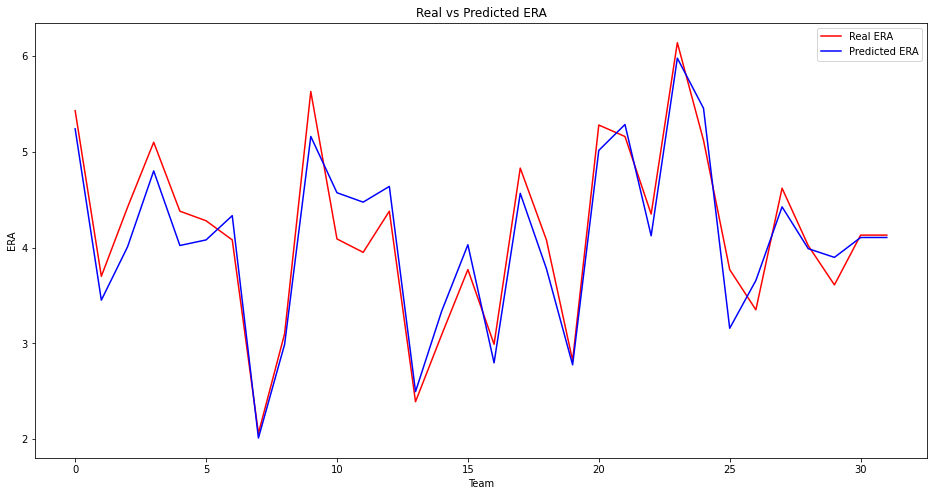

In [32]:
# Plot out real vs predicted
plt.figure(figsize=(16,8))
plt.title('Real vs Predicted ERA')
plt.plot(df_tested['Real ERA'], color='r')
plt.plot(df_tested['Predicted ERA'], color='blue')
plt.ylabel('ERA')
plt.xlabel('Team')
plt.legend(['Real ERA', 'Predicted ERA'])